<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/main/4-BoundaryLayer/Assigment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4. Growth of Turbulent Boundary Layer

In the Notebook we have found a function that computes, for every $c_f$ the corresponding value of $\text{Re}_\delta$ (and, consequently, $\delta$).

1. Use this function to find a power fit of the type

$$
c_f = K \text{Re}_\delta^n
$$

2.  Use this to define a function for the friction velocity as a function of $\delta$ and $U$, `u_tau(delta, U)`

3. Introduce this function into the log-law to find a cloud of points $(y,u)$ and fit again witha power law

$$
\left(\frac{u}{U}\right) = K'\left(\frac{y}{\delta}\right)^m
$$

This is know as the power-law for the turbulent boundary layer. It is, as the log-law, valid only for $y^+ \gtrapprox 30$

4. Finally use the von Kármán equation for steady uniform flow, equation (27), to find how a turbulent boundary layer grows, $\delta(x)$.

First excercie

Fitted Parameters: K = 0.022413999245361613, n = -0.16790236404090228


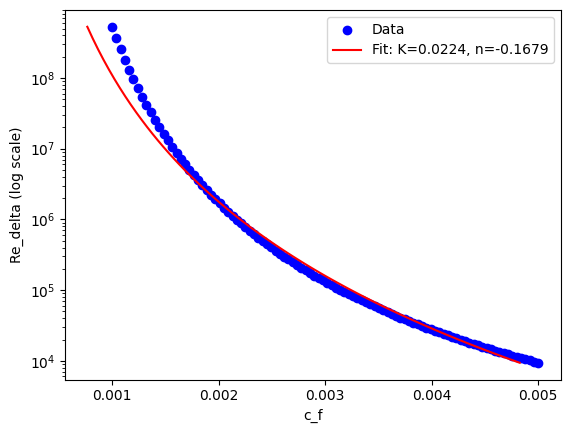

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

def Re_fun(c_f):
  Re_delta = 0.182058646604666*np.exp(0.579827560572969/np.sqrt(c_f))/np.sqrt(c_f)
  return Re_delta

def cf(Re_delta, K, n):
    return K * Re_delta**n

# def cf_solution(Re_delta):
#   cf = 0.022 * Re_delta**(-1/6)
#   return cf
# K = 0.02 n=-1/6
start = 0.001
end = 0.005
num_points = 100
vector_cf = np.linspace(start, end, num_points)
vector_Re_delta = Re_fun(vector_cf)

dataVector = [vector_cf,vector_Re_delta]
#dataSolution = [cf_solution(vector_Re_delta),vector_Re_delta]
#print(dataVector)

popt, pcov = opt.curve_fit(cf, dataVector[1], dataVector[0], p0=[0, 0])  # Initial guess

K_fit, n_fit = popt  # Extract fitted parameters
print(f"Fitted Parameters: K = {K_fit}, n = {n_fit}")

# Compute the fitted curve
fitted_cf = cf(vector_Re_delta, K_fit, n_fit)
# Plot original data and fitted curve
plt.scatter(vector_cf,vector_Re_delta, label="Data", color="blue")
plt.plot(fitted_cf,vector_Re_delta, label=f"Fit: K={K_fit:.4f}, n={n_fit:.4f}", color="red")

plt.yscale("log")
plt.ylabel("Re_delta (log scale)")
plt.xlabel("c_f")
plt.legend()
plt.show()

# popt, pcov = opt.curve_fit(cf, dataVector[0],dataVector[1])
# print(popt)

# plt.scatter(dataVector[0],dataVector[1])
# #plt.plot(dataSolution[0],dataSolution[1])
# plt.yscale("log")
# plt.xlabel(" c_f[log]")
# plt.ylabel("Re_delta")
# plt.legend()
# plt.show()


In [17]:
def uTau(delta, U , n,K,nu):
  Re = U*delta/nu
  tau = (K*Re**n)*0.5*U**2
  u_tau = np.sqrt(tau)
  return u_tau

In [18]:
K_fit

np.float64(0.022413999245361613)

0.50550216495048


np.float64(0.0008902039025769215)

array([0.08902039, 0.0982222 , 0.10742402, 0.11662583, 0.12582765,
       0.13502946, 0.14423128, 0.15343309, 0.1626349 , 0.17183672,
       0.18103853, 0.19024035, 0.19944216, 0.20864398, 0.21784579,
       0.2270476 , 0.23624942, 0.24545123, 0.25465305, 0.26385486,
       0.27305668, 0.28225849, 0.2914603 , 0.30066212, 0.30986393,
       0.31906575, 0.32826756, 0.33746937, 0.34667119, 0.355873  ,
       0.36507482, 0.37427663, 0.38347845, 0.39268026, 0.40188207,
       0.41108389, 0.4202857 , 0.42948752, 0.43868933, 0.44789115,
       0.45709296, 0.46629477, 0.47549659, 0.4846984 , 0.49390022,
       0.50310203, 0.51230385, 0.52150566, 0.53070747, 0.53990929,
       0.5491111 , 0.55831292, 0.56751473, 0.57671654, 0.58591836,
       0.59512017, 0.60432199, 0.6135238 , 0.62272562, 0.63192743,
       0.64112924, 0.65033106, 0.65953287, 0.66873469, 0.6779365 ,
       0.68713832, 0.69634013, 0.70554194, 0.71474376, 0.72394557,
       0.73314739, 0.7423492 , 0.75155102, 0.76075283, 0.76995

Fitted Parameters: K' = 0.9754, m = 0.1457


array([0.68571038, 0.69560849, 0.70474375, 0.71323329, 0.72116865,
       0.72862283, 0.73565498, 0.74231375, 0.74863968, 0.75466688,
       0.76042439, 0.76593709, 0.77122652, 0.77631141, 0.7812082 ,
       0.78593136, 0.79049373, 0.79490673, 0.79918059, 0.80332448,
       0.80734671, 0.81125475, 0.81505543, 0.81875495, 0.82235897,
       0.82587269, 0.82930087, 0.83264793, 0.8359179 , 0.83911454,
       0.84224134, 0.84530151, 0.84829807, 0.85123382, 0.85411138,
       0.85693319, 0.85970154, 0.86241859, 0.86508636, 0.86770674,
       0.87028152, 0.8728124 , 0.87530096, 0.87774872, 0.88015709,
       0.88252743, 0.88486102, 0.88715908, 0.88942274, 0.89165313,
       0.89385127, 0.89601816, 0.89815476, 0.90026196, 0.90234063,
       0.9043916 , 0.90641565, 0.90841354, 0.91038599, 0.9123337 ,
       0.91425733, 0.91615752, 0.91803487, 0.91988998, 0.92172341,
       0.9235357 , 0.92532738, 0.92709894, 0.92885087, 0.93058363,
       0.93229769, 0.93399346, 0.93567136, 0.93733181, 0.93897

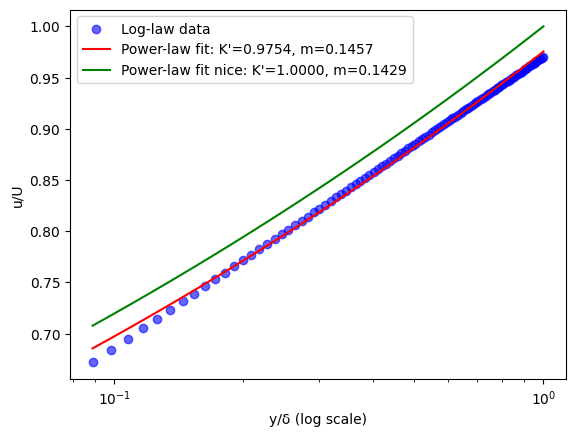

In [19]:
a = 0.41  # von Kármán constant
b = 5.0       # empirical constant

# Flow parameters
U = 10 # Free-stream velocity
Uval = U
nu = 1.5e-5  # Kinematic viscosity (arbitrary small value)
delta = 1e-2  # Boundary layer thickness
# Compute friction velocity
u_tau = uTau(delta, U , n_fit,K_fit,nu)
print(u_tau)


# Generate y values in log scale

y_Limit = 30*nu/u_tau;
display(y_Limit)
y_values = np.linspace(y_Limit, delta, 100)  # from very close to the wall to delta
y_values = y_values / delta
display(y_values)
# Compute velocity using log-law
u_values = u_tau * ((1/a) * np.log(y_values*delta * u_tau / nu) + b )
u_values = u_values/U

# Power-law function for fitting
def power_law(y, K_prime, m):
    return (K_prime * (y) ** m)


# Fit the power law to the generated data
popt, _ = opt.curve_fit(power_law, y_values, u_values, p0=[1,0.14])  # Initial guess

K_prime_fit, m_fit = popt
print(f"Fitted Parameters: K' = {K_prime_fit:.4f}, m = {m_fit:.4f}")

# Generate fitted curve
u_fit = power_law(y_values, K_prime_fit, m_fit)
display(u_fit)
u_fit_nice = power_law(y_values, 1, 1/7)
# Plot original log-law data and fitted power-law curve
plt.scatter(y_values, u_values, label="Log-law data", color="blue", alpha=0.6)
plt.plot(y_values, u_fit, label=f"Power-law fit: K'={K_prime_fit:.4f}, m={m_fit:.4f}", color="red")
plt.plot(y_values, u_fit_nice, label=f"Power-law fit nice: K'={1:.4f}, m={1/7:.4f}", color="green")
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("y/δ (log scale)")
plt.ylabel("u/U")
plt.legend()
plt.show()

#K ~ 1 ; m~1/7


In [24]:
import sympy as sp

rho = 1

def power_law(y,delta, K_prime, m):
    return (K_prime * (y/delta) ** m)


tau, u, U, y,x = sp.symbols('tau u U y x')
delta = sp.Function('delta')(x)
integral = u/U * (1 - u/U)
integral = integral.subs(u/U, power_law(y,delta, K_prime_fit, m_fit))
kPrimePrime = sp.integrate(integral, (y, 0, delta))

display(kPrimePrime)

def Tau(delta, U , n,K,nu):
  Re = U*delta/nu
  return (K*Re**n)*0.5



tau = Tau(delta, U, K_fit, n_fit, nu)

display(tau)

diffEq = sp.Eq(tau,kPrimePrime.diff(x))
diffEq = diffEq.subs(U,Uval)
diffEq = diffEq.simplify()
display(diffEq)

solution = sp.dsolve(diffEq, delta, ics={delta.subs(x,0):0,})
display(solution)




0.114613234211745*delta(x)

-0.107683683326054*(U*delta(x))**0.0224139992453616

Eq(0.113387166202401*delta(x)**0.0224139992453616, -0.114613234211745*Derivative(delta(x), x))

KeyboardInterrupt: 